In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

#### population data from: https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=1710007801

In [2]:
mort_file_2015 = os.path.join("..","datas", "new_mortality", "2015 mortality.csv")

mort_2015 = pd.read_csv(mort_file_2015)
mort_2015 = mort_2015.rename(columns={"2015": "Number of Mortality"})


In [3]:
# population file
pop_file = os.path.join("..","datas", "population", "population.csv")
pop_df = pd.read_csv(pop_file)

# select only 2015, then clean
pop_df = pop_df[["Geography", "Age group", "2015"]]
pop_df = pop_df.rename(columns={"2015":"population"})
pop_df = pop_df.sort_values(by=["Geography"])
pop_df = pop_df.reset_index(drop=True)

# Change string type to int type
pop_df["population"] = pop_df["population"].str.replace(",", "")
pop_df["population"] = pop_df["population"].astype(int)
pop_df.dtypes

Geography     object
Age group     object
population     int32
dtype: object

In [4]:
# Merge dataframe
merged = pd.merge(pop_df,mort_2015)

# Calculate mortality rate
rate = (100*(merged["Number of Mortality"]/merged["population"]))
merged["Mortality Rate"] = rate

merged


,Geography,Age group,population,Number of Mortality,Mortality Rate
0,"Abbotsford-Mission, British Columbia",All ages,184021,1252,0.680357
1,"Barrie, Ontario",All ages,202264,1426,0.705019
2,"Brantford, Ontario",All ages,144109,1339,0.929158
3,"Calgary, Alberta",All ages,1432169,6655,0.464680
4,"Edmonton, Alberta",All ages,1358345,8173,0.601688
5,"Greater Sudbury, Ontario",All ages,165261,1698,1.027466
6,"Guelph, Ontario",All ages,153290,1077,0.702590
7,"Halifax, Nova Scotia",All ages,416824,3136,0.752356
8,"Hamilton, Ontario",All ages,769853,6725,0.873543
9,"Kelowna, British Columbia",All ages,195305,1717,0.879138


In [5]:
rate = (100*(merged["Number of Mortality"]/merged["population"]))
merged["Mortality Rate"] = rate

#### Median income: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1110000801&pickMembers%5B0%5D=1.42

In [6]:
med_inc_file = os.path.join("..","datas", "income", "median_income.csv")
income_df = pd.read_csv(med_inc_file)
income_df = income_df.dropna()

# drop other years except 2015
income_df = income_df.drop(columns=["2013", "2014", "2016"])

# change type to integer
income_df["2015"] = income_df["2015"].str.replace(",","").astype(int)

# calculate mean of ottawa-gatinuea Quebec part and Ont part
# Ottawa-Gatineau, Ontario/Quebec
x = (income_df["2015"][9] + income_df["2015"][10])/2

# append row to df
income_df = income_df.append({"Geography":
                              "Ottawa-Gatineau, Ontario/Quebec","2015":x}, 
                             ignore_index=True)

# now get rid of Quebec part and Ont part.
income_df = income_df.drop(income_df.index[9:11])

# sort it alphabatically
income_df = income_df.sort_values(by=["Geography"]).reset_index(drop=True)

# rename year to median income
income_df = income_df.rename(columns={"2015":"Median Income"})
income_df

,Geography,Median Income
0,"Abbotsford-Mission, British Columbia",30290.0
1,"Barrie, Ontario",35270.0
2,"Brantford, Ontario",33010.0
3,"Calgary, Alberta",43130.0
4,"Edmonton, Alberta",43190.0
5,"Greater Sudbury, Ontario",38560.0
6,"Guelph, Ontario",39260.0
7,"Halifax, Nova Scotia",36390.0
8,"Hamilton, Ontario",35990.0
9,"Kelowna, British Columbia",34610.0


In [7]:
merge = pd.merge(merged,income_df).drop(columns=["Age group"])

### Merge Health indicators

In [12]:
health_file = os.path.join("..","datas", "Health", "Health_Indicators.csv")

health_df = pd.read_csv(health_file)
health_df = health_df.rename(columns={"City": "Geography"})

merged_df = pd.merge(merge, health_df)

merged_df.to_csv("merged.csv")

### Graphs

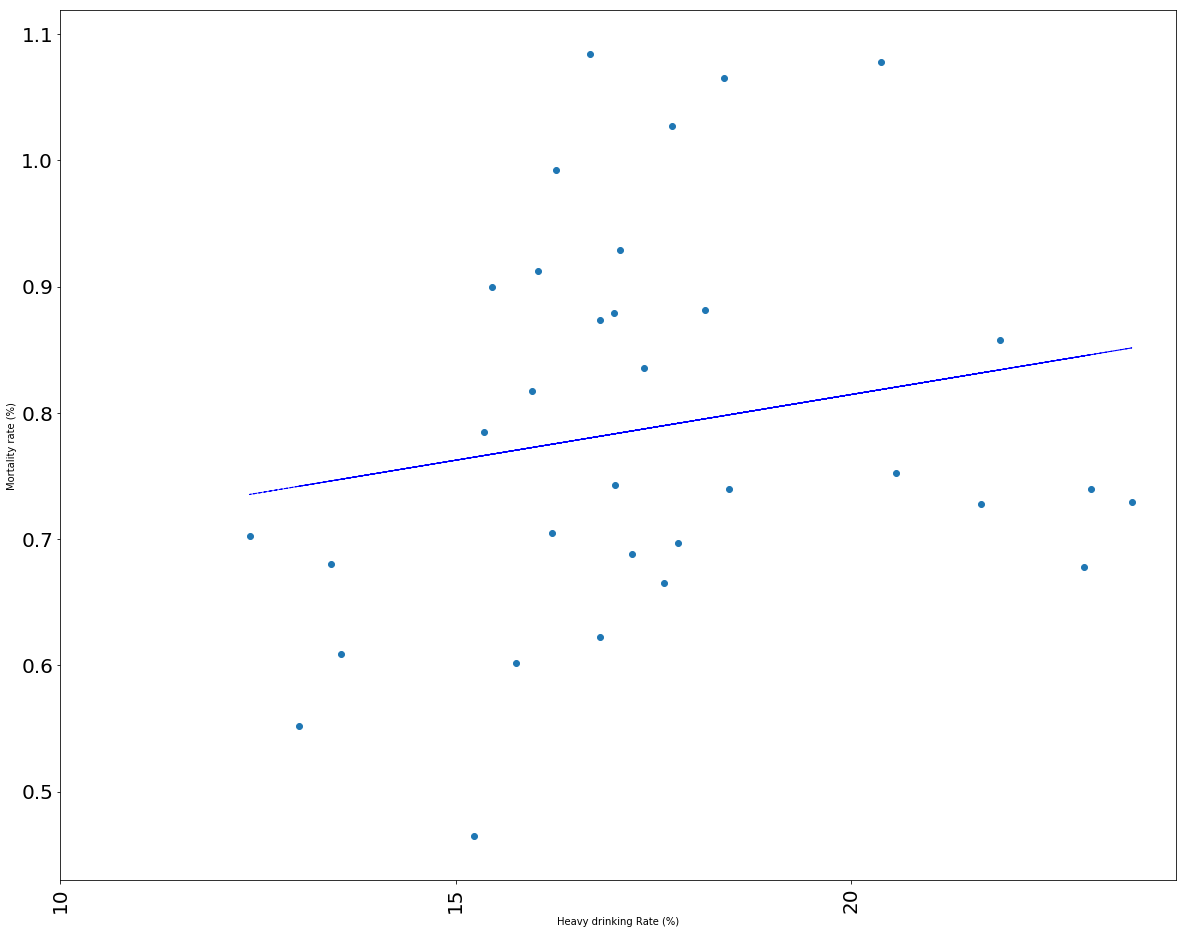

In [9]:
x = merged_df["Heavy drinking"]
y = merged_df["Mortality Rate"]


# x = merged_df["population"]
# y = merged_df["Number of Mortality"]
# linear regression with Mortality Rate Vs. Heavy Drinking
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(x, y)
lof = m_slope*x + m_int

fig, ax = plt.subplots(figsize=(20, 16))

ax.scatter(x,y)
ax.plot(x,lof, "b--", linewidth=1)
ax.set_xticks(np.arange(10,25,5))
ax.set_ylabel("Mortality rate (%)")
ax.set_xlabel("Heavy drinking Rate (%)")
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20,rotation="vertical");

In [10]:
print(m_slope)
print(m_int)
print(m_r)
print(m_p)
print(m_std_err)


0.010410058182796016
0.6063591309560774
0.19084375457461888
0.28739290131037976
0.009616962991399044


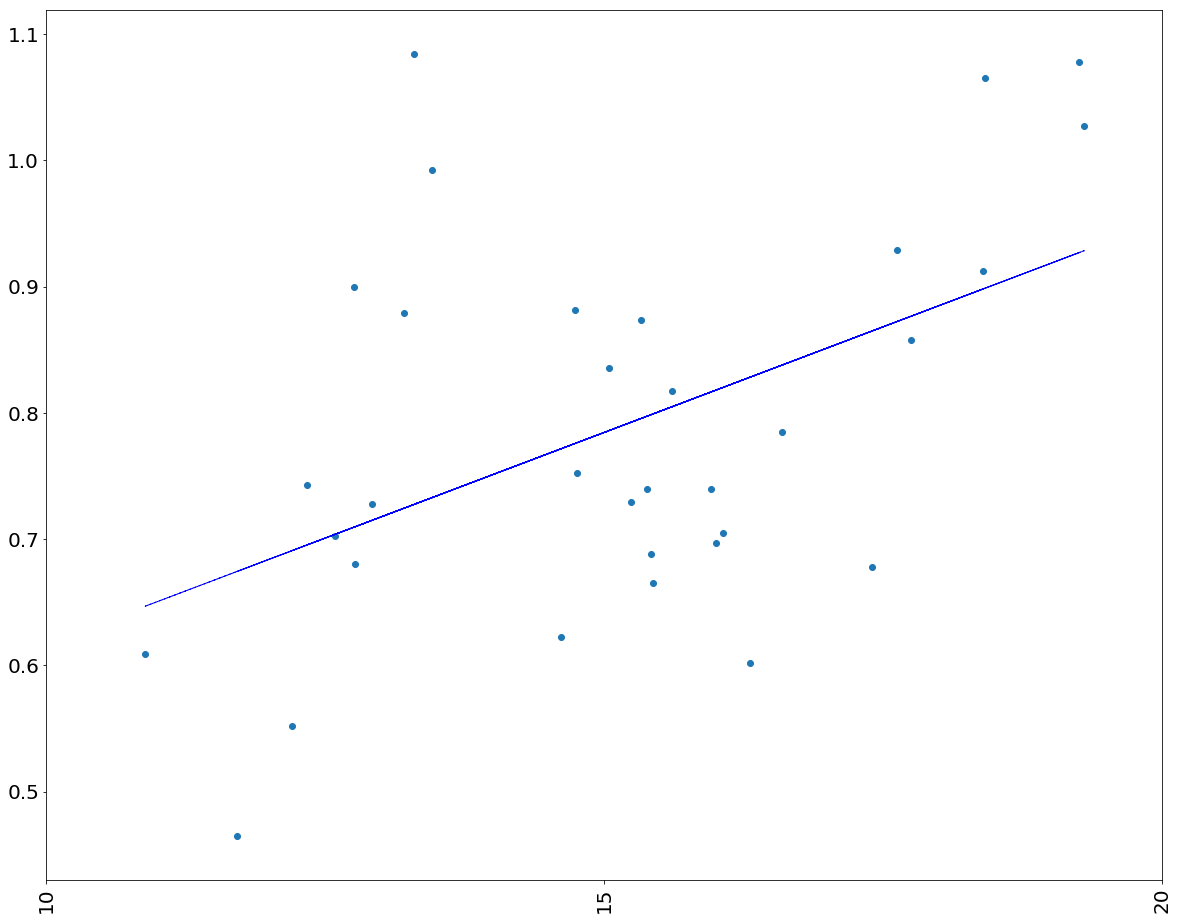

In [15]:
x = merged_df["daily smoker"]

m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(x, y)
lof = m_slope*x + m_int

fig, ax = plt.subplots(figsize=(20, 16))
ax.scatter(x,y)
ax.plot(x,lof, "b--", linewidth=1)
ax.set_xticks(np.arange(10,25,5))
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20,rotation="vertical");

In [14]:
print(m_slope)
print(m_int)
print(m_r)
print(m_p)
print(m_std_err)

0.03346524163466586
0.28249687414529656
0.48224070654810736
0.004482959632000709
0.010918741162367572
